# Agregar comentarios a dataset

En esta notebook agregamos respuestas a comentarios 

In [2]:
%load_ext autoreload
%autoreload 2
from mongoengine import connect
from tweepyrate import create_apps
from hatespeech_models import Tweet, Article

client = connect("hatespeech-news")


print(f"Tenemos {Article.objects.count()} artículos")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Tenemos 230124 artículos


In [3]:
import json

with open("comments_not_anon.json", "r") as f:
    comments = json.load(f)
    
len(comments)

19310

In [ ]:
comments[]

In [5]:
hateful_comments = [c for c in comments if len(c['HATE']) >= 2 ]

len(hateful_comments)

3429

In [11]:
hateful_comments[190]

{'id': 345018,
 'text': '@usuario Dejen de comer cualquier porquería!!!!!!!! 😫😫😫',
 'article_id': 1242933290077753350,
 'annotators': ['annotator_2', 'annotator_3', 'annotator_5'],
 'HATE': ['annotator_3', 'annotator_5'],
 'CALLS': [],
 'WOMEN': [],
 'LGBTI': [],
 'RACISM': ['annotator_3', 'annotator_5'],
 'CLASS': [],
 'POLITICS': [],
 'DISABLED': [],
 'APPEARANCE': [],
 'CRIMINAL': [],
 'tweet_id': 1242941314100080640}

In [40]:
from tqdm.auto import tqdm

reply_count = []

hateful_with_replies = []


for comment in tqdm(hateful_comments):
    replies = Tweet.objects(in_reply_to_status_id=comment["tweet_id"])
    
    
    count = replies.count()
    
    if count:
        comment["replies"] = [
            {"text": reply.text, "tweet_id": reply.id} 
            for reply in replies
        ]
        hateful_with_replies.append(comment)

Text(0.5, 1.0, 'Histograma de cantidad de respuestas por comentario odioso')

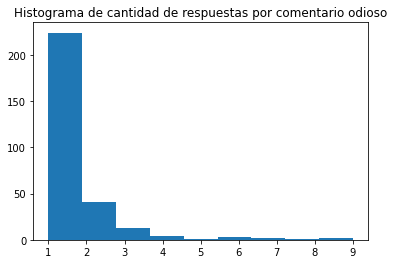

In [41]:
import matplotlib.pyplot as plt

plt.hist([len(c["replies"]) for c in hateful_with_replies], bins=9)

plt.title("Histograma de cantidad de respuestas por comentario odioso")

In [42]:
len(hateful_with_replies)

291

In [48]:
hateful_with_replies[0]

{'id': 343517,
 'text': '@usuario Cuando no los peruanos haciendo cosas de peruanos',
 'article_id': 1243678215186591745,
 'annotators': ['annotator_5', 'annotator_2', 'annotator_1'],
 'HATE': ['annotator_5', 'annotator_2', 'annotator_1'],
 'CALLS': [],
 'WOMEN': [],
 'LGBTI': [],
 'RACISM': ['annotator_5', 'annotator_2', 'annotator_1'],
 'CLASS': [],
 'POLITICS': [],
 'DISABLED': [],
 'APPEARANCE': [],
 'CRIMINAL': [],
 'tweet_id': 1244252904502054912,
 'replies': [{'text': '@ArianArkXIII @clarincom Ya llego el baboso que generaliza',
   'tweet_id': 1244253327875092533}]}

In [57]:
tweet

{'id': 373855,
 'text': '@usuario importamos trolos peruanos ?',
 'article_id': 1271749265715539968,
 'annotators': ['annotator_2', 'annotator_1', 'annotator_6'],
 'HATE': ['annotator_2', 'annotator_1', 'annotator_6'],
 'CALLS': [],
 'WOMEN': [],
 'LGBTI': ['annotator_2', 'annotator_1', 'annotator_6'],
 'RACISM': ['annotator_2', 'annotator_1', 'annotator_6'],
 'CLASS': [],
 'POLITICS': [],
 'DISABLED': [],
 'APPEARANCE': [],
 'CRIMINAL': [],
 'tweet_id': 1271856833624498176,
 'replies': [{'text': '@Sergio2Due @infobae Importamos a toda la escoria de sudamerica hace unos 30 años casi.',
   'tweet_id': 1272502945519742976}]}

Uso artículos para mostrar contexto

In [64]:
with open("articles.json") as f:
    articles = json.load(f)
    
articles = {article['tweet_id']: article for article in articles}

In [67]:
hate_categories = [
    "WOMEN",
    "LGBTI",
    "RACISM",
    "CLASS",
    "POLITICS",
    "DISABLED",
    "APPEARANCE",
    "CRIMINAL",
]

for tweet in hateful_with_replies:
    print("="*80)
    article = articles[tweet["article_id"]]
    print(f"Artículo: {article['title']}\n")
    
    print("Comentario: ", tweet["text"], "\n")
    
    stats = {key:len(tweet[key]) for key in hate_categories}
    max_votes = max(stats.values())
    most_voted = [k for k in hate_categories if stats[k] == max_votes]
    
    print("Motivo de odio: ", most_voted, "\n")
    
    print("Respuestas: ")
    
    for reply in tweet["replies"]:
        print(f"      - {reply['text']}")
    
    

Artículo: Reacción brutal: quisieron quemar 200 murciélagos por miedo al coronavirus en Perú

Comentario:  @usuario Cuando no los peruanos haciendo cosas de peruanos 

Motivo de odio:  ['RACISM'] 

Respuestas: 
      - @ArianArkXIII @clarincom Ya llego el baboso que generaliza
Artículo: Tras decir una vulgaridad al aire, Maju Lozano exclamó: “¡Me olvidé que estaba abierto el micrófono!”

Comentario:  @usuario Gorda de mierda 

Motivo de odio:  ['APPEARANCE'] 

Respuestas: 
      - @gabriel85859198 @clarincom Que raro un libertario discriminando a las personas, por eso no pasan del 1% 😂😂
      - @gabriel85859198 @clarincom Habiendo tantas cosas por señalar, justo lo mas pelotudo nombrás. Te dibuja a la perfección.
Artículo: Tras decir una vulgaridad al aire, Maju Lozano exclamó: “¡Me olvidé que estaba abierto el micrófono!”

Comentario:  @usuario Es un sushi de bagre 

Motivo de odio:  ['APPEARANCE'] 

Respuestas: 
      - @Kingofburundia @clarincom 🤣🤣🤣🤣
Artículo: Hebe de Bonafini le ma

In [ ]:
with open("hateful_comments_with_replies.json", "w+") as f:
    json.dump()